In [35]:
######################### FOR BOT RECORDING #############################
# pip install nbconvert   
# jupyter nbconvert --to html ipynb_file
from gtts import gTTS
from pydub import AudioSegment
from pydub.playback import play  
import os  
import soundfile as sf
mytext = "Nisreen"
save_file_mp3 = f'./mp3/{mytext}.mp3'
save_file_wav = f'./db/{mytext}.wav'
myobj = gTTS(text=mytext, lang='ar' , slow=False).save(save_file_mp3)
AudioSegment.from_mp3(save_file_mp3).export(save_file_wav, format="wav")
play(AudioSegment.from_wav(save_file_wav))

In [2]:
# from pydub import AudioSegment
# from pydub.playback import play
# import librosa
# import soundfile as sf
# ref_file_name = "./db/Mostafa.wav"
# play(AudioSegment.from_wav(ref_file_name))
# audio,sr=librosa.load(ref_file_name)
# clip = librosa.effects.trim(audio, top_db= 20)
# print(clip[0].shape)
# sf.write(ref_file_name, clip[0], sr)
# print("Your Record After Trimming... ")
# play(AudioSegment.from_wav(ref_file_name))

In [52]:
############################## PLAY REF FILE #########################
from pydub import AudioSegment
from pydub.playback import play  
play(AudioSegment.from_wav("./db/Fatma.wav"))

In [53]:
################# TO RECORD AUDIO FOR 2 SECs INTO output.wav FILE #########################
import pyaudio
import wave
chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 2
filename = "./rec/Radwa/Fatma1.wav"
p = pyaudio.PyAudio()  # Create an interface to PortAudio
print('Recording')
stream = p.open(format=sample_format,channels=channels,rate=fs,frames_per_buffer=chunk,input=True)
frames = []  # Initialize array to store frames
# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)
# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()
print('Finished recording')
# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()
print("Your Record ... ")
play(AudioSegment.from_wav(filename))

Recording
Finished recording
Your Record ... 


In [80]:
################### RECORDED AUDIO SCILENCE REMOVAL ##########################
import librosa
import librosa.effects
import soundfile as sf
############ READ WAV FILE WITH SILENCE IN THE BEGINNING AND END ######################
# file_to_trim = './rec/Amira/hesham4.wav'
# audio, sr = librosa.load(file_to_trim, mono=True)
audio, sr = librosa.load(filename, mono=True)
print(audio.shape, sr)
############ REMOVING SILENCE #######################
clip = librosa.effects.trim(audio, top_db= 20)
print(clip[0].shape)
sf.write(filename, clip[0], sr)
print("Your Record After Trimming... ")
play(AudioSegment.from_wav(filename))

(37376,) 22050
(11776,)
Your Record After Trimming... 


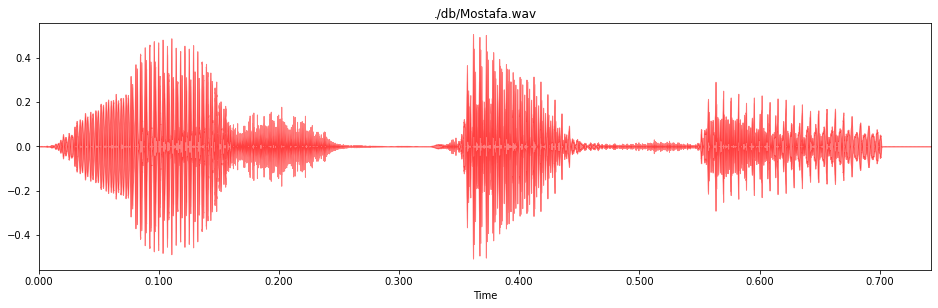

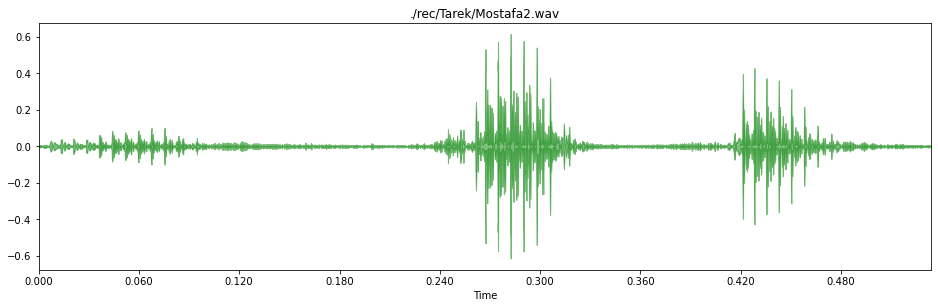

In [81]:
########### Play & Plot ################################ START RUNNING FROM HERE ############################
#Tried (Hassan : 0.01583922250969571 , Hesham : 0.007812005579388389 , Qabeel:0.015189969731522852 , 
# Nisreen : 0.013057866128906895 , Fatma : 0.01739175851742047 , Mostafa : 0.013734748264220796)
from pydub import AudioSegment
from pydub.playback import play
import librosa
import librosa.display
from matplotlib import pyplot as plt
ref_file_name = "./db/Mostafa.wav"
filename = "./rec/Tarek/Mostafa2.wav"
data1,sr1=librosa.load(ref_file_name)    ######### REF AUDIO
plt.figure(figsize=(16,10))
plt.subplot(2, 1, 1)
plt.title(ref_file_name)
librosa.display.waveplot(data1,sr1,color='r',alpha=0.5)
play(AudioSegment.from_wav(ref_file_name))

data2,sr2=librosa.load(filename)         ######### RECORDED AUD
plt.figure(figsize=(16,10))
plt.subplot(2, 1, 2)
plt.title(filename)
librosa.display.waveplot(data2,sr2,color='g',alpha=0.5)
play(AudioSegment.from_wav(filename))


In [82]:
######################################## RECORDED AUDIO DATA1 , SR1 ###################################
# n_fft = 4410
# hop_length = 512
# file = 'db\\Mostafa.wav'
file = filename
data1,sr1=librosa.load(file)
n_fft = int(0.025*sr1)      # 25 ms
hop_length = int(0.01*sr1)  # 10 ms
mfcc1 = librosa.feature.mfcc(y=data1, sr=sr1, n_mfcc=13, norm="ortho",hop_length=hop_length, n_fft=n_fft)
x_seq = mfcc1.T # .T means transpose
print(file,n_fft,hop_length)

./rec/Tarek/Mostafa2.wav 551 220


In [98]:
import librosa.sequence
import numpy as np
import os
from heapq import nsmallest
audio_files=[]
directory = r'db'   
for audio in os.listdir(directory): 
    path = os.path.join(directory, audio)
    audio_files.append(path)
dict={}
for ref_file in audio_files:
    data2 ,sr2= librosa.load(ref_file)
    n_fft = int(0.025*sr2)      # 25 ms
    hop_length = int(0.01*sr2)  # 10 ms
    mfcc2 = librosa.feature.mfcc(y=data2, sr=sr2, n_mfcc=13, norm="ortho",hop_length=hop_length, n_fft=n_fft)
    y_seq = mfcc2.T
    D, wp = librosa.sequence.dtw(X=mfcc1, Y=mfcc2, metric='cosine')
    N = y_seq.shape[0]
    M = x_seq.shape[0]
    dict[ref_file]=D[-1, -1]/(M + N)
print('The whole distances',dict)
print('The most similar file ',min(dict, key=dict.get))
print('The first 5 similar ',nsmallest(5, dict, key = dict.get))
# print('The Recorded Audio ',filename)
# print('The most similar file ',nsmallest(2, dict, key = dict.get)[1])


The whole distances {'db\\Ahmed.wav': 0.022456497508492185, 'db\\Aisha.wav': 0.03248167068236432, 'db\\Amira.wav': 0.027995430249247544, 'db\\Ashraqat.wav': 0.0219073377816427, 'db\\Aya.wav': 0.027003225504367404, 'db\\Dalia.wav': 0.02576854107244161, 'db\\Ebrahim.wav': 0.024867894454880943, 'db\\Fatma.wav': 0.016143794596176604, 'db\\Gehad.wav': 0.02748778963770687, 'db\\Ghada.wav': 0.021758906763077575, 'db\\Hassan.wav': 0.022298642764331574, 'db\\Hesham.wav': 0.023011914643027008, 'db\\Hisham.wav': 0.027058816116115166, 'db\\Khaled.wav': 0.025139649887328468, 'db\\Mohamed.wav': 0.02179183202461838, 'db\\Mostafa.wav': 0.013734748264220796, 'db\\Nisreen.wav': 0.023872100592954023, 'db\\Qabeel.wav': 0.029837710670912423, 'db\\Qasem.wav': 0.022004734129403566, 'db\\Radwa.wav': 0.01887244349851341, 'db\\Raouf.wav': 0.027461587843159455, 'db\\Record.wav': 0.01776045734038906, 'db\\Sabreen.wav': 0.024157592588157455, 'db\\Salah.wav': 0.029100486643113023, 'db\\Samy.wav': 0.0242925832019134

0.013734748264220796
REC MFCC M 54
REF MFCC N 75
ACCUMILATED COST D[-1, -1]/(M + N) =  0.013234888016786864
COST MATRIX (54, 75)... 
[[0.01072826 0.01566225 0.02267501 ... 3.31098524 3.33191931 3.35371343]
 [0.03718805 0.02626458 0.02202203 ... 2.78362113 2.82473036 2.8669581 ]
 [0.07249378 0.05064546 0.03463107 ... 2.69178344 2.74091464 2.79103447]
 ...
 [3.20982417 2.75001589 2.13687225 ... 1.67352105 1.70280557 1.73243551]
 [3.2296669  2.77167015 2.16026387 ... 1.66855218 1.68967731 1.71102941]
 [3.24809608 2.79156256 2.18400933 ... 1.67723807 1.68785545 1.70730055]]
WP MATRIX (77, 2)... 
[[53 74]
 [53 73]
 [52 72]
 [51 71]
 [50 70]
 [49 69]
 [48 68]
 [47 67]
 [47 66]
 [47 65]
 [47 64]
 [47 63]
 [46 62]
 [45 61]
 [45 60]
 [45 59]
 [44 58]
 [43 57]
 [42 56]
 [41 55]
 [40 54]
 [39 54]
 [38 53]
 [37 52]
 [36 51]
 [36 50]
 [36 49]
 [36 48]
 [35 47]
 [34 46]
 [33 45]
 [32 44]
 [31 43]
 [31 42]
 [31 41]
 [30 40]
 [29 39]
 [28 38]
 [27 37]
 [26 36]
 [25 35]
 [24 35]
 [23 34]
 [22 33]
 [21 

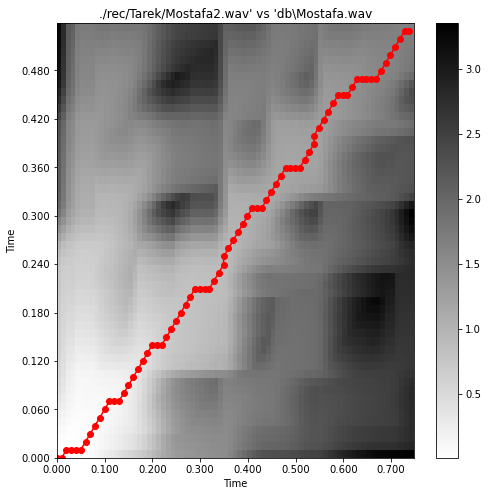

In [100]:
# n_fft = 4410
# hop_size = 512
# sim2=min(dict, key=dict.get)
sim2=nsmallest(2, dict, key = dict.get)[0]
print(dict[sim2])
sim_data ,sim_fs= librosa.load(sim2)
n_fft = int(0.020*sim_fs)      # 25 ms
hop_length = int(0.01*sim_fs)  # 10 ms
sim_mfcc = librosa.feature.mfcc(y=sim_data, sr=sim_fs, n_mfcc=13, norm="ortho",hop_length=hop_length, n_fft=n_fft)
D, wp = librosa.sequence.dtw(X=mfcc1, Y=sim_mfcc, metric='cosine')
wp_s = np.asarray(wp) * hop_length / sr1
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',cmap='gray_r', hop_length=hop_length)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title(f"{file}' vs '{sim2}")
plt.colorbar()
print('REC MFCC M',mfcc1.shape[1])
print('REF MFCC N',sim_mfcc.shape[1])
print('ACCUMILATED COST D[-1, -1]/(M + N) = ', D[-1, -1]/(mfcc1.shape[1] + sim_mfcc.shape[1]))
print(f'COST MATRIX {D.shape}... \n{D}')
print(f'WP MATRIX {wp.shape}... \n{wp}')



In [43]:
# # n_fft = 4410
# # hop_length = 512
# # n_fft = int(0.025*sim_fs)      # 25 ms
# # hop_length = int(0.01*sim_fs)  # 10 ms
# mfcc1 = librosa.feature.mfcc(y=data1, sr=sr1, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
# mfcc2 = librosa.feature.mfcc(y=sim_data, sr=sim_fs, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
# import librosa.sequence
# import numpy as np
# D, wp = librosa.sequence.dtw(X=mfcc1, Y=mfcc2, metric='cosine')
# wp_s = np.asarray(wp) * hop_length / sr1
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# librosa.display.specshow(D, x_axis='time', y_axis='time',cmap='gray_r', hop_length=hop_length)
# imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),origin='lower', interpolation='nearest', aspect='auto')
# ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
# plt.title(f"{file}' vs '{sim2}")
# plt.colorbar()

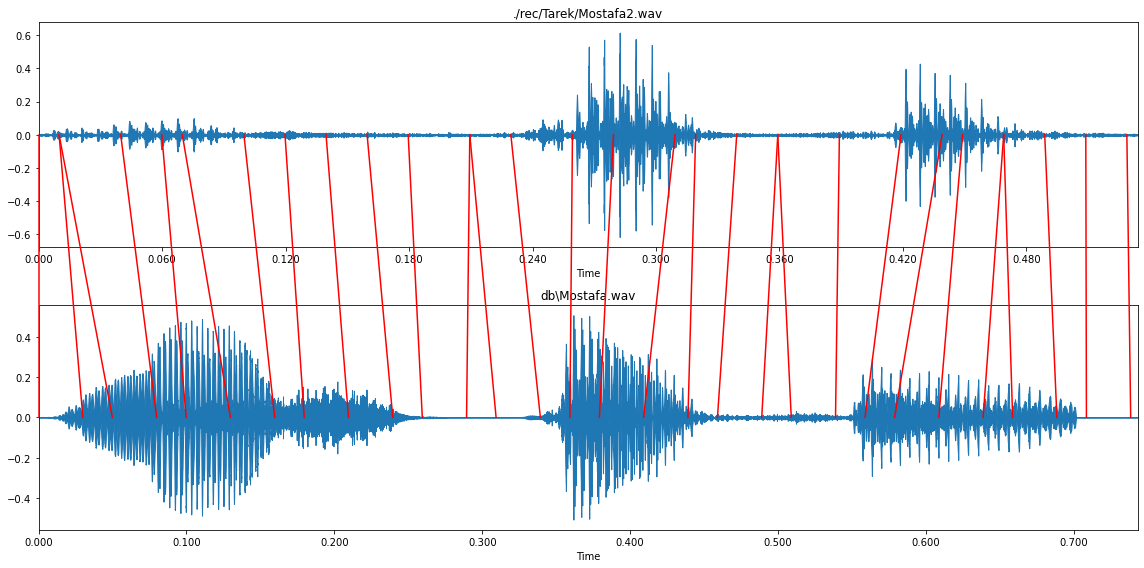

In [96]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(data1, sr=sr1)
plt.title(file)
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(sim_data, sr=sim_fs)
plt.title(sim2)
ax2 = plt.gca()

plt.tight_layout()
trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
#Returns num evenly spaced samples, calculated over the interval [start, stop].
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_length / sr1:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))
    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='red')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

In [140]:
# import librosa.sequence
# import numpy as np
# from dtw import dtw
# from numpy.linalg import norm
# from heapq import nsmallest
# dict2={}
# for ref_file in audio_files:
#     data2, sr2 = librosa.load(ref_file)
#     mfcc2 = librosa.feature.mfcc(y=data2, sr=sr2, n_mfcc=13, norm="ortho",hop_length=hop_length, n_fft=n_fft)
#     y_seq = mfcc2.T
#     dist, cost, acc_cost, path = dtw(x_seq, y_seq, dist=lambda x, y: norm(x - y, ord=1))
#     dict2[ref_file]=dist
# print('The whole distances',dict2)
# print('The most similar file ',min(dict2, key=dict2.get))
# print('The first 5 similar ',nsmallest(5, dict2, key = dict2.get))


In [141]:
# import librosa
# import matplotlib.pyplot as plt
# from dtw import dtw
# from numpy.linalg import norm
# #Loading audio files
# y1, sr1 = librosa.load('db\\Hassan.wav') 
# y2, sr2 = librosa.load('db\\Hassan1.wav') 

# #Showing multiple plots using subplot
# #plt.subplot(1, 2, 1) 
# mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values
# #librosa.display.specshow(mfcc1)

# #plt.subplot(1, 2, 2)
# mfcc2 = librosa.feature.mfcc(y2, sr2)
# #librosa.display.specshow(mfcc2)

# dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
# #dist, cost, path = dtw(mfcc1.T, mfcc2.T)
# print("The normalized distance between the two : ",dist)   # 0 for similar audios 

# plt.imshow(cost.T, origin='lower', cmap=plt.get_cmap('gray'), interpolation='nearest',aspect='auto')
# plt.plot(path[0], path[1], 'w')
# #plt.xlim((-0.5, cost.shape[0]-0.5))
# #plt.ylim((-0.5, cost.shape[1]-0.5))
# # plt.imshow(cost.T, origin='lower', cmap=plt.get_cmap('gray'), interpolation='nearest')
# # plt.plot(path[0], path[1], 'w')   #creating plot for DTW

# # plt.show()  #To display the plots graphically